**The Discrete Fourier Transform (DFT)** is the equivalent of the continuous Fourier Transform for signals known only at instants separated by sample times (i.e. a finite sequence of data).


In [13]:

# https://youtu.be/lzR86lz1Sg8

import cv2
from matplotlib import pyplot as plt
import numpy as np

Text(0.5, 1.0, '2D Sine Wave Image')

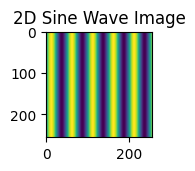

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a 2D sine wave image
x = np.arange(256)  # generate 1-D sine wave  
y = np.sin(2 * np.pi * x / 50)  # Control the frequency
y += max(y)  # offset sine wave by the max value to go out of negative range of sine 

# Create 2-D array of sine-wave
img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8)

# Plot 2D image
plt.figure(figsize=(3, 3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='viridis')
plt.title('2D Sine Wave Image')

In [15]:

import numpy as np
import plotly.graph_objs as go
# Create surface plot
x_vals = np.arange(img.shape[0])
y_vals = np.arange(img.shape[1])
X, Y = np.meshgrid(x_vals, y_vals)
Z = img

fig = plt.figure()
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='3D Surface of Sine Wave Image')
fig.update_layout(scene=dict(zaxis=dict(range=[0, 150])))

fig.show()

<Figure size 640x480 with 0 Axes>

Example 1

In [23]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#plt.style.use(["science", "notebook"])
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

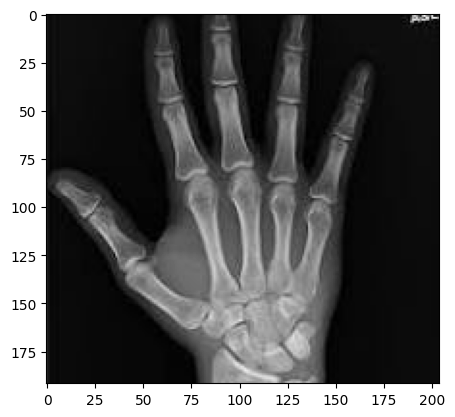

In [25]:
img = color.rgb2gray(io.imread("hand_x-ray.jpeg"))
plt.imshow(img, cmap="gray")

In [26]:
img_FT = fft2(img)
fy = np.fft.fftfreq(
    img.shape[0], d=10
)  # suppose the spacing between pixels is 10mm, for example
fx = np.fft.fftfreq(img.shape[1], d=10)

print(
    "{:.2f} correponds to fx={:.6f} and fy={:.6f}".format(
        img_FT[10, 20], fx[20], fy[10]
    )
)

0.67+14.98j correponds to fx=0.009804 and fy=0.005208


#Remove low frequencies


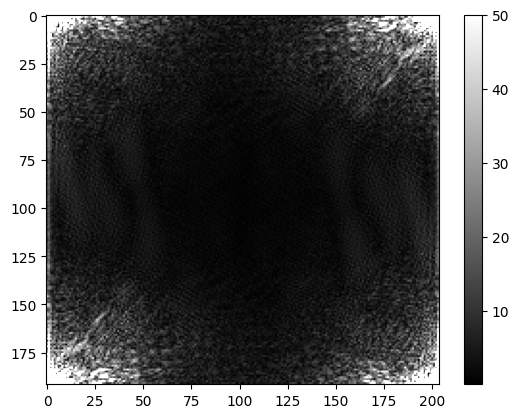

In [29]:

img_FT_alt = np.copy(img_FT)
img_FT_alt[-2:] = 0 
img_FT_alt[:,-2:] = 0 
img_FT_alt[:2] = 0 
img_FT_alt[:,:2] = 0 

img_alt = np.abs(ifft2(img_FT_alt))

plt.imshow(np.abs(img_FT), cmap="gray", vmax=50)
plt.colorbar()
img_alt = np.abs(ifft2(img_FT_alt))

In [30]:
img_FT_alt = np.copy(img_FT)
img_FT_alt[-2:] = 0
img_FT_alt[:, -2:] = 0
img_FT_alt[:2] = 0
img_FT_alt[:, :2] = 0

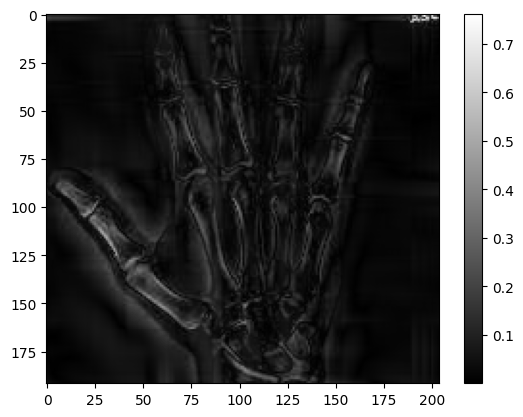

In [31]:
plt.imshow(img_alt, cmap="gray")
plt.colorbar()

img_alt = np.abs(ifft2(img_FT_alt))


#img = np.rot90(frame)  #Rotate img by 90 degrees
#img = cv2.imread('images/2d_sine.png', 0) # load an image

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Shift DFT. First check the output without the shift
dft_shift = np.fft.fftshift(dft)

#Calculate magnitude spectrum from the DFT
#Added 1 as we may see 0 values and log of 0 is indeterminate
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)

#As the spatial frequency increases (bars closer), 
#the peaks in the DFT amplitude spectrum move farther away from the origin

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT of image')
plt.show()

Example 2

/var/folders/wp/4dd5xcyj0ygcggnl55qmrw2c0000gq/T/ipykernel_88751/4245839028.py:74: RuntimeWarning:

divide by zero encountered in log



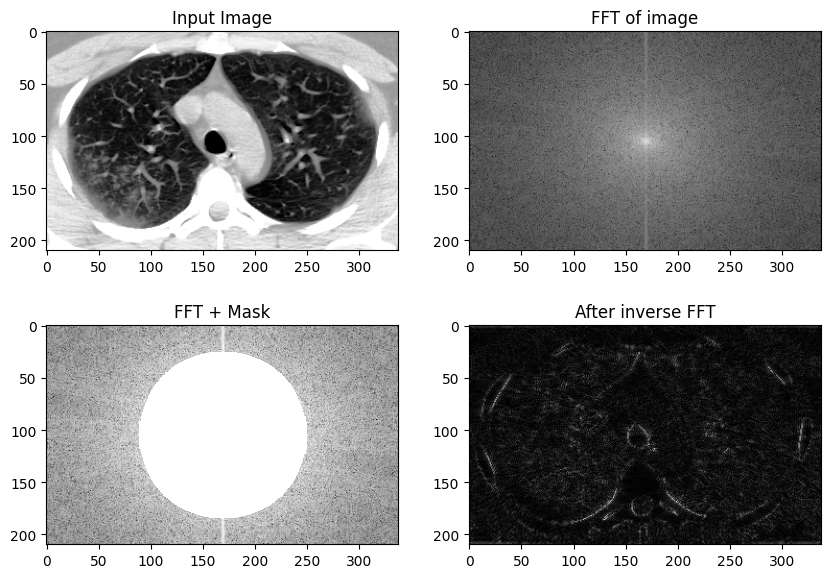

In [32]:


# https://youtu.be/Wka_XhcZAcQ

import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread("Set2_Case02__8_47.png", 0)  # load an image

# Output is a 2D complex array. 1st channel real and 2nd imaginary
# For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Rearranges a Fourier transform X by shifting the zero-frequency
# component to the center of the array.
# Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
# For values that are 0 we may end up with indeterminate values for log.
# So we can add 1 to the array to avoid seeing a warning.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
# Can be used for edge detection because low frequencies at center are blocked
# and only high frequencies are allowed. Edges are high frequency components.
# Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
# Can smooth out noise but blurs edges.
#


# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text("Input Image")
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text("FFT of image")
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(fshift_mask_mag, cmap="gray")
ax3.title.set_text("FFT + Mask")
ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(img_back, cmap="gray")
ax4.title.set_text("After inverse FFT")
plt.show()

## Blur and Sharpen convolution kernel

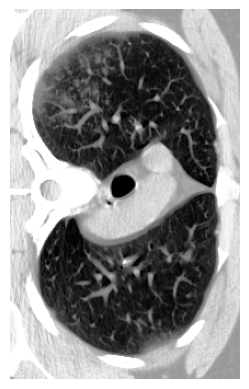

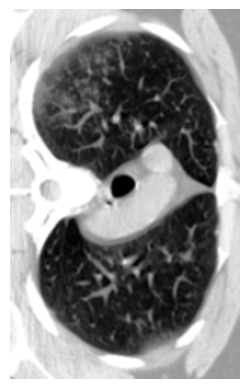

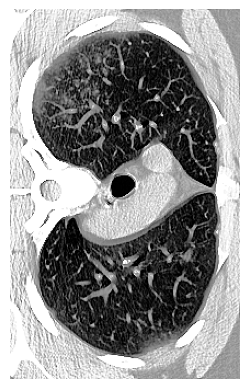

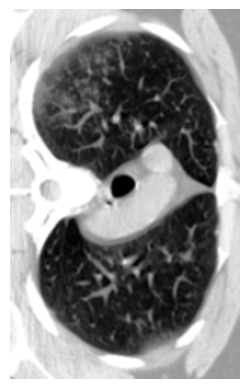

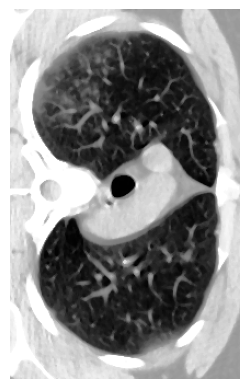

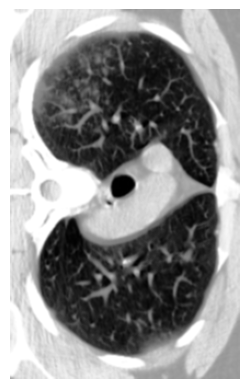

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# original image
original_image = cv2.imread(
    "Set2_Case02_Silica 18_PA000001_ST000001_SE000008_47.png", 0
)

# blur and sharpen convolution kernel
M = 3
blur_kernel = np.ones((M, M)) * 1 / (M * M)

sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)

# apply the covolution
blur_image = cv2.filter2D(src=original_image, ddepth=-1, kernel=blur_kernel)

sharpen_image = cv2.filter2D(src=original_image, ddepth=-1, kernel=sharpen_kernel)

# display the result
plt.imshow(original_image, cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(blur_image, cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(sharpen_image, cmap="gray")
plt.axis("off")
plt.show()

# built in image bluring
builtin_blur = cv2.blur(src=original_image, ksize=(3, 3))

plt.imshow(builtin_blur, cmap="gray")
plt.axis("off")
plt.show()

builtin_median = cv2.medianBlur(src=original_image, ksize=3)

plt.imshow(builtin_median, cmap="gray")
plt.axis("off")
plt.show()

builtin_gaussian = cv2.GaussianBlur(
    src=original_image, ksize=(3, 3), sigmaX=0, sigmaY=0
)

plt.imshow(builtin_gaussian, cmap="gray")
plt.axis("off")
plt.show()